In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

In [2]:
# Data Load
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")

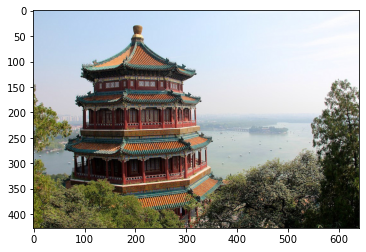

In [3]:
plt.imshow(china)

In [9]:
# 0~255사이 RGB 값으로 있음
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [4]:
# Data Scaling
china_flatten = china / 255.0
china_flatten = china_flatten.reshape(-1, 3)
china_flatten.shape

(273280, 3)

In [5]:
# Data EDA
def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data
    
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

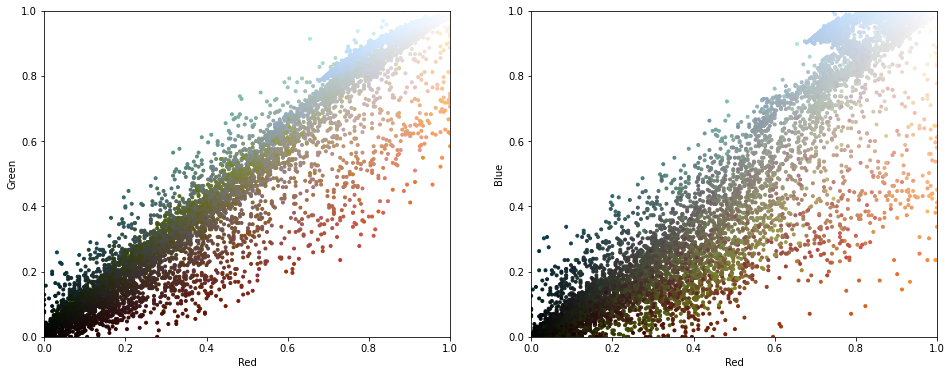

In [6]:
plot_pixels(china_flatten)

In [7]:
# K Means
# 16개의 색상으로 압축
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=16)

In [8]:
kmeans.fit(china_flatten)

KMeans(n_clusters=16)

In [10]:
# 16개의 새로운 색상
kmeans.cluster_centers_

array([[0.42429776, 0.43913105, 0.39301867],
       [0.75126143, 0.83982734, 0.93997543],
       [0.36082013, 0.24829279, 0.12480902],
       [0.94777768, 0.96225995, 0.98648718],
       [0.58827368, 0.63161215, 0.61583554],
       [0.80389095, 0.82422467, 0.84347608],
       [0.15054406, 0.12362504, 0.08928062],
       [0.86000305, 0.62014435, 0.45504137],
       [0.8677903 , 0.91385083, 0.96519792],
       [0.71040885, 0.74892512, 0.73936054],
       [0.32316474, 0.32198219, 0.26955729],
       [0.21220056, 0.21800083, 0.17551145],
       [0.55755788, 0.54087789, 0.43006667],
       [0.67922928, 0.38867249, 0.28205738],
       [0.45243775, 0.42587174, 0.21789746],
       [0.0525649 , 0.04947922, 0.02703346]])

In [11]:
# 변환
new_color_label = kmeans.predict(china_flatten)

In [12]:
new_colors = kmeans.cluster_centers_[new_color_label]

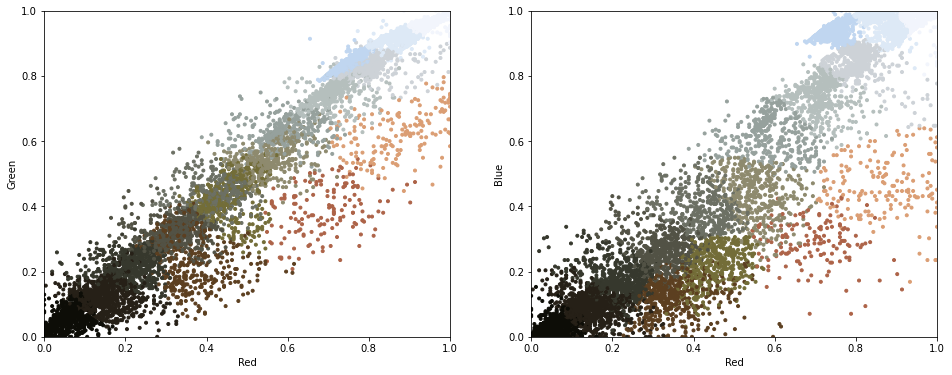

In [13]:
plot_pixels(china_flatten, colors=new_colors)

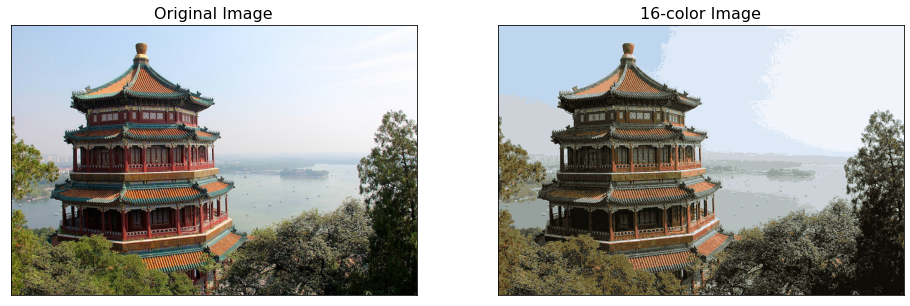

In [14]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
# fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("16-color Image", size=16);

In [15]:
# 더 작은 K값
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)

In [16]:
# 학습
kmeans.fit(china_flatten)

KMeans()

In [17]:
# 8개의 새로운 색상의 RGB 값들
kmeans.cluster_centers_

array([[0.91643371, 0.9429179 , 0.97717024],
       [0.3960466 , 0.35402022, 0.23586841],
       [0.66155746, 0.69765906, 0.68318569],
       [0.08467658, 0.07433938, 0.04909265],
       [0.23274843, 0.20604775, 0.15118587],
       [0.77497677, 0.83402334, 0.89666338],
       [0.81461534, 0.57028229, 0.4116603 ],
       [0.51054655, 0.50308535, 0.41015495]])

In [18]:
# 변환
new_color_label = kmeans.predict(china_flatten)

In [19]:
new_colors = kmeans.cluster_centers_[new_color_label]

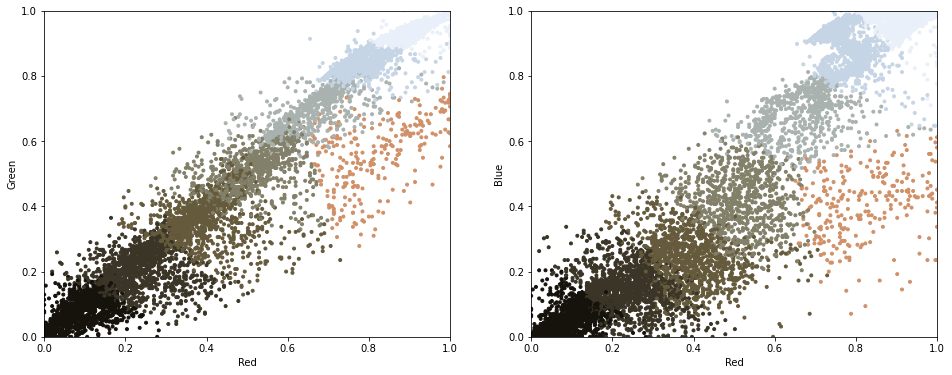

In [20]:
plot_pixels(china_flatten, colors=new_colors)

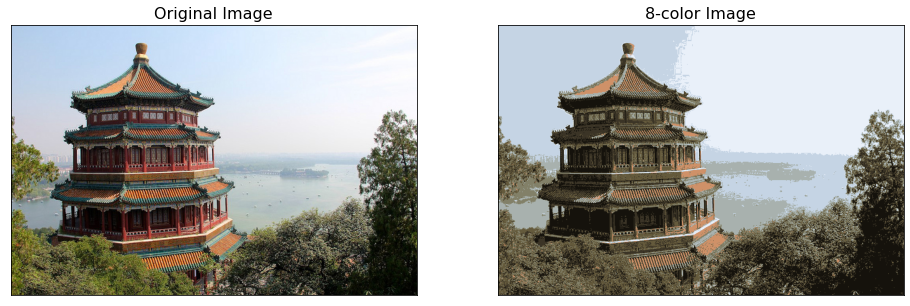

In [21]:
# 비교
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
# fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("8-color Image", size=16);

In [ ]:
# 고해상도 이미지를 저해상도 이미지로 보내줄 때 K-Means 알고리즘 사용해서 압축